In [1]:
import torch
from torch import nn
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

# Preparing Data

Extracting data from `.xlsx` to pandas DataDrame.

In [2]:
data = pd.read_excel('./drive/MyDrive/Colab Notebooks/hy-demographic/99531228.xlsx')
data

,Unnamed: 0,"Age and Sex distribution of De jure Population* of RA City Yerevan, as of the beginning of the year",Unnamed: 2,Unnamed: 3,Unnamed: 4,Unnamed: 5,Unnamed: 6,Unnamed: 7,Unnamed: 8,Unnamed: 9,...,Unnamed: 27,Unnamed: 28,Unnamed: 29,Unnamed: 30,Unnamed: 31,Unnamed: 32,Unnamed: 33,Unnamed: 34,Unnamed: 35,Unnamed: 36
0,NaN,NaN,NaN,NaN,Total Population,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,/person/
2,Age,2011 Population Census,NaN,NaN,2012,NaN,NaN,2013,NaN,NaN,...,NaN,2020,NaN,NaN,2021,NaN,NaN,2022,NaN,NaN
3,NaN,Male,Female,Total,Male,Female,Total,Male,Female,Total,...,Total,Male,Female,Total,Male,Female,Total,Male,Female,Total
4,0,6723,6081,12804,7048,6384,13432,8269,7332,15601,...,14158,7279,6668,13947,8551,7813,16364,7260,6832,14092
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
85,Total,490362,569776,1060138,490806,570238,1061044,493588,572676,1066264,...,1081874,500562,583462,1084024,504770,586977,1091747,505477,587301,1092778
86,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
87,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
88,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [3]:
data = data.iloc[3:, 1:]
data.head()

,"Age and Sex distribution of De jure Population* of RA City Yerevan, as of the beginning of the year",Unnamed: 2,Unnamed: 3,Unnamed: 4,Unnamed: 5,Unnamed: 6,Unnamed: 7,Unnamed: 8,Unnamed: 9,Unnamed: 10,...,Unnamed: 27,Unnamed: 28,Unnamed: 29,Unnamed: 30,Unnamed: 31,Unnamed: 32,Unnamed: 33,Unnamed: 34,Unnamed: 35,Unnamed: 36
3,Male,Female,Total,Male,Female,Total,Male,Female,Total,Male,...,Total,Male,Female,Total,Male,Female,Total,Male,Female,Total
4,6723,6081,12804,7048,6384,13432,8269,7332,15601,8091,...,14158,7279,6668,13947,8551,7813,16364,7260,6832,14092
5,7090,6263,13353,7070,6233,13303,6989,6335,13324,8215,...,14362,7355,6799,14154,7277,6664,13941,8548,7811,16359
6,7554,7060,14614,7535,7098,14633,7066,6224,13290,6987,...,15333,7568,6792,14360,7353,6798,14151,7275,6663,13938
7,7161,6341,13502,7172,6425,13597,7528,7097,14625,7065,...,15878,7901,7430,15331,7568,6790,14358,7352,6795,14147


In [4]:
data = data.iloc[:-4, :]
data.tail()

,"Age and Sex distribution of De jure Population* of RA City Yerevan, as of the beginning of the year",Unnamed: 2,Unnamed: 3,Unnamed: 4,Unnamed: 5,Unnamed: 6,Unnamed: 7,Unnamed: 8,Unnamed: 9,Unnamed: 10,...,Unnamed: 27,Unnamed: 28,Unnamed: 29,Unnamed: 30,Unnamed: 31,Unnamed: 32,Unnamed: 33,Unnamed: 34,Unnamed: 35,Unnamed: 36
81,2016,2679,4695,2145,2819,4964,2824,4257,7081,2492,...,6230,1873,2874,4747,1208,1981,3189,1139,1924,3063
82,2001,2886,4887,1913,2750,4663,2004,2686,4690,2671,...,7279,2392,3599,5991,1776,2770,4546,1108,1888,2996
83,1881,2615,4496,1885,2686,4571,1815,2616,4431,1865,...,6094,2781,4216,6997,2227,3447,5674,1660,2672,4332
84,8562,15115,23677,8617,15139,23756,9312,15742,25054,9945,...,36528,15095,23661,38756,15722,24737,40459,15864,24912,40776
85,490362,569776,1060138,490806,570238,1061044,493588,572676,1066264,494291,...,1081874,500562,583462,1084024,504770,586977,1091747,505477,587301,1092778


In [5]:
new_header = data.iloc[0]
data = data[1:]
data.columns = new_header
data

3,Male,Female,Total,Male,Female,Total,Male,Female,Total,Male,...,Total,Male,Female,Total,Male,Female,Total,Male,Female,Total
4,6723,6081,12804,7048,6384,13432,8269,7332,15601,8091,...,14158,7279,6668,13947,8551,7813,16364,7260,6832,14092
5,7090,6263,13353,7070,6233,13303,6989,6335,13324,8215,...,14362,7355,6799,14154,7277,6664,13941,8548,7811,16359
6,7554,7060,14614,7535,7098,14633,7066,6224,13290,6987,...,15333,7568,6792,14360,7353,6798,14151,7275,6663,13938
7,7161,6341,13502,7172,6425,13597,7528,7097,14625,7065,...,15878,7901,7430,15331,7568,6790,14358,7352,6795,14147
8,6913,6378,13291,6996,6319,13315,7172,6425,13597,7527,...,16105,8355,7519,15874,7899,7428,15327,7567,6784,14351
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
81,2016,2679,4695,2145,2819,4964,2824,4257,7081,2492,...,6230,1873,2874,4747,1208,1981,3189,1139,1924,3063
82,2001,2886,4887,1913,2750,4663,2004,2686,4690,2671,...,7279,2392,3599,5991,1776,2770,4546,1108,1888,2996
83,1881,2615,4496,1885,2686,4571,1815,2616,4431,1865,...,6094,2781,4216,6997,2227,3447,5674,1660,2672,4332
84,8562,15115,23677,8617,15139,23756,9312,15742,25054,9945,...,36528,15095,23661,38756,15722,24737,40459,15864,24912,40776


In [6]:
total_population = data.iloc[:, 2::3]
total_header = list(range(2011, 2023))
total_population.columns = total_header
total_population.reset_index(drop=True, inplace=True)
total_population

,2011,2012,2013,2014,2015,2016,2017,2018,2019,2020,2021,2022
0,12804,13432,15601,15397,16131,15894,15346,14372,14158,13947,16364,14092
1,13353,13303,13324,15506,15301,16118,15884,15337,14362,14154,13941,16359
2,14614,14633,13290,13321,15488,15299,16115,15881,15333,14360,14151,13938
3,13502,13597,14625,13285,13297,15486,15295,16110,15878,15331,14358,14147
4,13291,13315,13597,14622,13268,13296,15486,15294,16105,15874,15327,14351
...,...,...,...,...,...,...,...,...,...,...,...,...
77,4695,4964,7081,6447,7045,6752,6736,7531,6230,4747,3189,3063
78,4887,4663,4690,6736,6055,6667,6402,6416,7279,5991,4546,2996
79,4496,4571,4431,4385,6372,5684,6259,6053,6094,6997,5674,4332
80,23677,23756,25054,26147,26994,29731,31597,34168,36528,38756,40459,40776


In [7]:
X = np.linspace(2011, 2022, 12)
y = total_population.iloc[-1:, :].to_numpy()[0]

X, y

(array([2011., 2012., 2013., 2014., 2015., 2016., 2017., 2018., 2019.,
        2020., 2021., 2022.]),
 array([1060138, 1061044, 1066264, 1068306, 1071511, 1073660, 1075841,
        1077590, 1081874, 1084024, 1091747, 1092778], dtype=object))

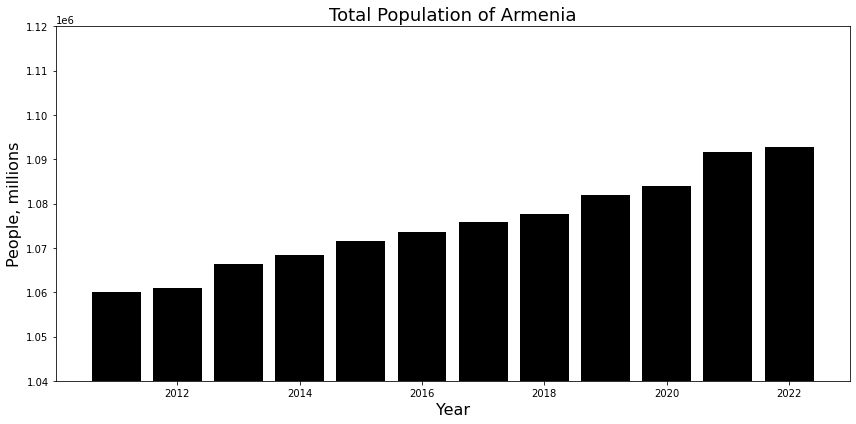

In [8]:
plt.figure(figsize=(12, 6))
plt.title('Total Population of Armenia', fontsize=18)
plt.bar(X, y, color='black', width=0.8)
plt.ylim(bottom=1.04e6, top=1.12e6)
plt.xlabel('Year', fontsize=16)
plt.ylabel('People, millions', fontsize=16)
plt.tight_layout()
plt.show()

# Creating a linear regression model for extrapolating

In [9]:
class NonLinearRegression(nn.Module):
  def __init__(self):
    super().__init__()
    self.a = nn.Parameter(torch.randn(1))
    self.b = nn.Parameter(torch.randn(1))

  def forward(self, x):
    return self.a * x + self.b

In [10]:
model = NonLinearRegression()
for name, param in model.named_parameters():
  print(f"{name}: {param}\n")

a: Parameter containing:
tensor([1.6119], requires_grad=True)

b: Parameter containing:
tensor([-0.7117], requires_grad=True)



# Creating a loss function (MSE)

In [11]:
loss_function = nn.MSELoss()

# Initializing the optimizer

In [12]:
X, y

(array([2011., 2012., 2013., 2014., 2015., 2016., 2017., 2018., 2019.,
        2020., 2021., 2022.]),
 array([1060138, 1061044, 1066264, 1068306, 1071511, 1073660, 1075841,
        1077590, 1081874, 1084024, 1091747, 1092778], dtype=object))

In [13]:
X_ml = torch.Tensor(X) - 2000
y_ml = torch.Tensor(y.astype(np.float32)) - 1e6

X_ml, y_ml

(tensor([11., 12., 13., 14., 15., 16., 17., 18., 19., 20., 21., 22.]),
 tensor([60138., 61044., 66264., 68306., 71511., 73660., 75841., 77590., 81874.,
         84024., 91747., 92778.]))

In [14]:
epochs = 30000

optimizer = torch.optim.SGD(model.parameters(), lr=3e-3)

for epoch in range(epochs):
  model.train()
  y_pred = model(X_ml)
  loss = loss_function(y_pred, y_ml)
  optimizer.zero_grad()
  loss.backward()
  optimizer.step()
  if epoch % 1000 == 0:
    print(f'loss: {loss}')

loss: 5787643392.0
loss: 19493890.0
loss: 12608460.0
loss: 8438909.0
loss: 5913974.5
loss: 4384976.0
loss: 3459064.25
loss: 2898376.0
loss: 2558841.0
loss: 2353231.5
loss: 2228719.0
loss: 2153322.25
loss: 2107660.25
loss: 2080013.625
loss: 2063269.125
loss: 2053133.375
loss: 2046992.0
loss: 2043273.5
loss: 2041022.875
loss: 2039658.0
loss: 2038832.625
loss: 2038331.875
loss: 2038030.125
loss: 2037846.125
loss: 2037730.375
loss: 2037665.5
loss: 2037631.125
loss: 2037600.625
loss: 2037583.625
loss: 2037576.375


In [15]:
for name, param in model.named_parameters():
  print(f"{name}: {param}")

a: Parameter containing:
tensor([2965.6782], requires_grad=True)
b: Parameter containing:
tensor([26463.7949], requires_grad=True)


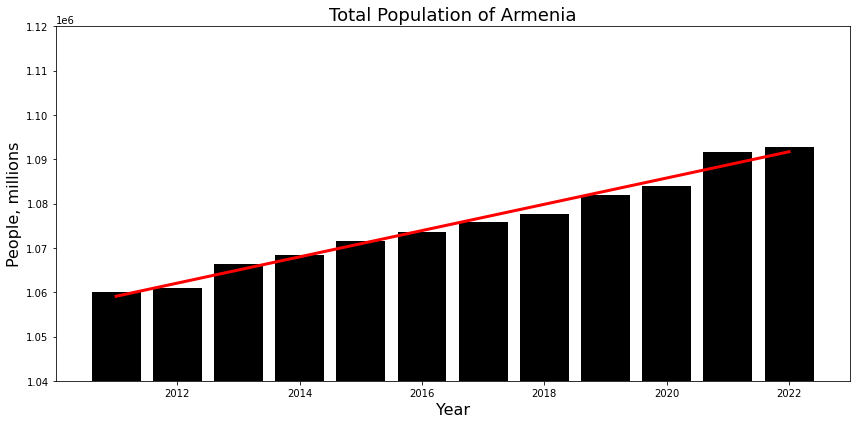

In [16]:
plt.figure(figsize=(12, 6))
plt.title('Total Population of Armenia', fontsize=18)
plt.bar(X, y, color='black', width=0.8)

new_y = 2965.6782 * X_ml + 26463.7949
plt.plot(X, new_y + 1e6, c='red', linewidth=3)
plt.ylim(bottom=1.04e6, top=1.12e6)
plt.xlabel('Year', fontsize=16)
plt.ylabel('People, millions', fontsize=16)
plt.tight_layout()
plt.show()

In [17]:
X_extra = np.array(range(2023, 2033))
y_extra = 2965.6782 * (X_extra - 2000) + 26463.7949 + 1e6

X_extra, y_extra

(array([2023, 2024, 2025, 2026, 2027, 2028, 2029, 2030, 2031, 2032]),
 array([1094674.3935, 1097640.0717, 1100605.7499, 1103571.4281,
        1106537.1063, 1109502.7845, 1112468.4627, 1115434.1409,
        1118399.8191, 1121365.4973]))

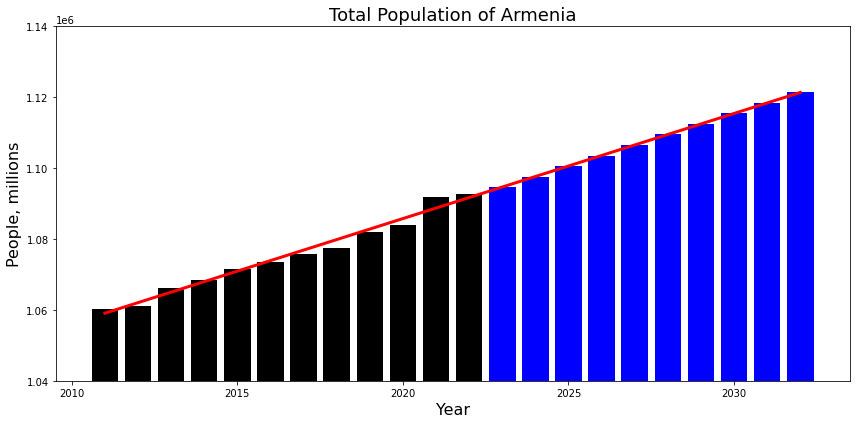

In [18]:
plt.figure(figsize=(12, 6))
plt.title('Total Population of Armenia', fontsize=18)
plt.bar(X, y, color='black', width=0.8)
plt.bar(X_extra, y_extra, color='blue', width=0.8)

plt.plot(list(X) + list(X_extra), list(new_y + 1e6) + list(y_extra), c='red', linewidth=3)

plt.ylim(bottom=1.04e6, top=1.14e6)
plt.xlabel('Year', fontsize=16)
plt.ylabel('People, millions', fontsize=16)
plt.tight_layout()
plt.show()